# 处理时间序列

In [3]:
import datetime

In [4]:
datetime.date(2015, 4, 19)

datetime.date(2015, 4, 19)

In [5]:
datetime.datetime(2015, 4, 19, 12, 59, 59)

datetime.datetime(2015, 4, 19, 12, 59, 59)

使用 dateutil 模块对各种字符串格式的日期进行正确解析

In [8]:
from dateutil import parser

In [9]:
parser.parse('2015-04-19')

datetime.datetime(2015, 4, 19, 0, 0)

In [11]:
parser.parse("4th of July, 2015")

datetime.datetime(2015, 7, 4, 0, 0)

In [13]:
date = parser.parse("2015-04-19")
date.weekday()

6

In [14]:
date.strftime('%A')

'Sunday'

In [15]:
import numpy as np

In [19]:
date = np.array('2015-04-29', dtype=np.datetime64)
date

array('2015-04-29', dtype='datetime64[D]')

In [20]:
date + np.arange(12)

array(['2015-04-29', '2015-04-30', '2015-05-01', '2015-05-02',
       '2015-05-03', '2015-05-04', '2015-05-05', '2015-05-06',
       '2015-05-07', '2015-05-08', '2015-05-09', '2015-05-10'],
      dtype='datetime64[D]')

In [21]:
np.datetime64('2015-04-19')

numpy.datetime64('2015-04-19')

In [22]:
np.datetime64('2015-04-19 12:00')

numpy.datetime64('2015-04-19T12:00')

In [24]:
np.datetime64('2015-04-19 12:59:59', 'ms')

numpy.datetime64('2015-04-19T12:59:59.000')

In [25]:
import pandas as pd

In [27]:
pd.to_datetime('2015-04-19')

Timestamp('2015-04-19 00:00:00')

In [28]:
pd.to_datetime('4th of July, 2015')

Timestamp('2015-07-04 00:00:00')

In [29]:
pd.to_datetime('2015-04-19').strftime('%A')

'Sunday'

In [31]:
pd.to_datetime('2015-04-19') + np.arange(12)

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [32]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04','2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [33]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [34]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [35]:
data['2015-8']

2015-08-04    3
dtype: int64

In [44]:
dates = pd.to_datetime([datetime.datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [47]:
pd.to_datetime([datetime.datetime(2015, 7, 3), '4th of July, 2015',  '20150708'])

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-08'], dtype='datetime64[ns]', freq=None)

In [48]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [50]:
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [51]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [52]:
pd.date_range('4 july, 2014', '2015-07-10')

DatetimeIndex(['2014-07-04', '2014-07-05', '2014-07-06', '2014-07-07',
               '2014-07-08', '2014-07-09', '2014-07-10', '2014-07-11',
               '2014-07-12', '2014-07-13',
               ...
               '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', length=372, freq='D')

In [55]:
pd.date_range('2015-07-03', periods=4)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06'], dtype='datetime64[ns]', freq='D')

In [56]:
pd.date_range('2015-07-03', periods=4, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00'],
              dtype='datetime64[ns]', freq='H')

In [58]:
pd.period_range('2015-07-03', periods=4, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10'], dtype='period[M]')

In [63]:
pd.timedelta_range('1 day', periods=4)

TimedeltaIndex(['1 days', '2 days', '3 days', '4 days'], dtype='timedelta64[ns]', freq='D')

In [66]:
pd.timedelta_range(0, periods=4, freq='2H')

TimedeltaIndex(['0 days 00:00:00', '0 days 02:00:00', '0 days 04:00:00',
                '0 days 06:00:00'],
               dtype='timedelta64[ns]', freq='2H')

In [67]:
pd.period_range('2015-07', periods=4, freq='Q')

PeriodIndex(['2015Q3', '2015Q4', '2016Q1', '2016Q2'], dtype='period[Q-DEC]')

In [75]:
pd.period_range('2016-02', periods=4, freq='Q-JAN')

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4'], dtype='period[Q-JAN]')

In [77]:
pd.period_range('2016-02', periods=4, freq='W-MON')

PeriodIndex(['2016-01-26/2016-02-01', '2016-02-02/2016-02-08',
             '2016-02-09/2016-02-15', '2016-02-16/2016-02-22'],
            dtype='period[W-MON]')

In [78]:
pd.period_range('2016-02', periods=4, freq='2H30T')

PeriodIndex(['2016-02-01 00:00', '2016-02-01 02:30', '2016-02-01 05:00',
             '2016-02-01 07:30'],
            dtype='period[150T]')

In [79]:
from pandas_datareader import data

In [92]:
apple = pd.read_csv('Apple Stock.csv', index_col=0, parse_dates=True)

In [93]:
apple.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,0.806567,0.865209,0.782053,0.860883,535796800,0.0,0
2000-01-04,0.832523,0.850789,0.778208,0.788302,512377600,0.0,0
2000-01-05,0.797915,0.850308,0.792147,0.799837,778321600,0.0,0
2000-01-06,0.816181,0.822910,0.730621,0.730621,767972800,0.0,0
2000-01-07,0.742157,0.776765,0.734466,0.765229,460734400,0.0,0


In [100]:
(apple.index[-1]-apple.index[0]).days

7668

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<Axes: xlabel='Date'>

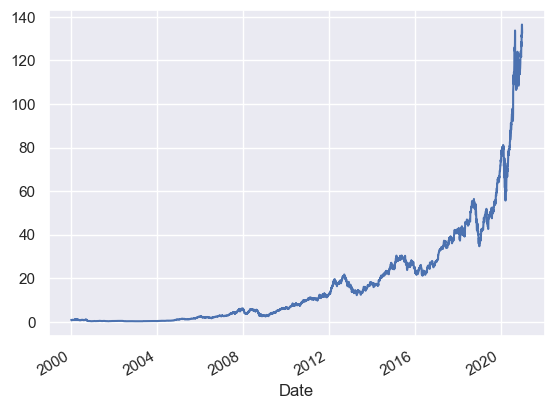

In [103]:
apple['Close'].plot()

In [104]:
price = apple['Close']

In [149]:
pd.period_range('2015-01-01', periods=3, freq='Q')

PeriodIndex(['2015Q1', '2015Q2', '2015Q3'], dtype='period[Q-DEC]')

In [126]:
pd.Timestamp("2014-01-02") + pd.offsets.MonthBegin(n=1)

Timestamp('2014-02-01 00:00:00')

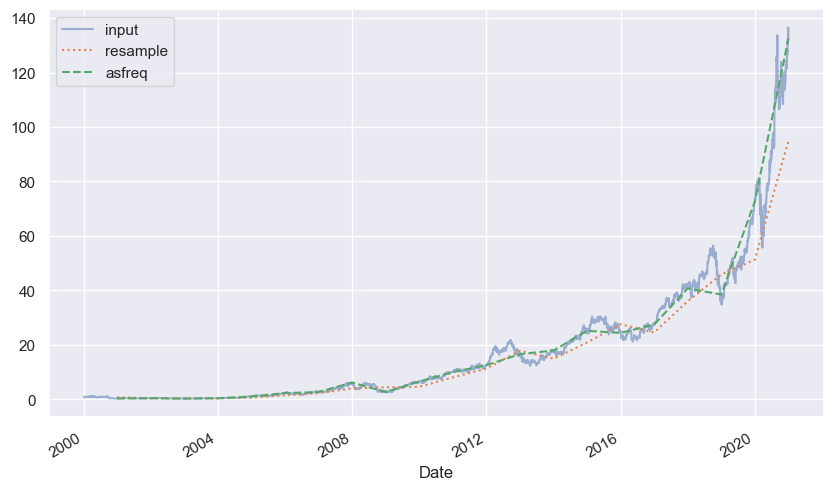

In [127]:
plt.figure(figsize=(10, 6))
price.plot(alpha = 0.5, style = '-')
price.resample('BA').mean().plot(style = ':')
price.asfreq('BA').plot(style = '--')
plt.legend(['input', 'resample', 'asfreq'], loc = 'upper left')
plt.show()

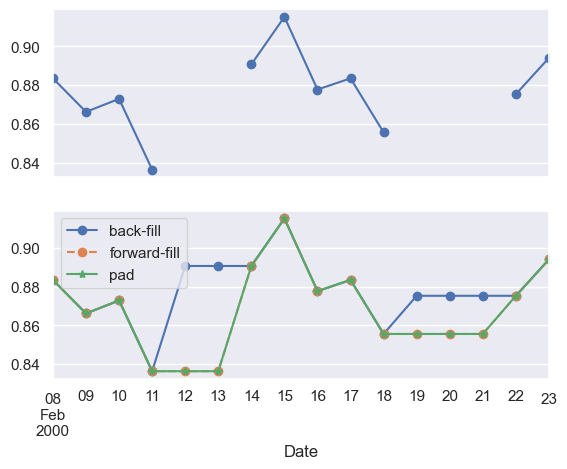

In [162]:
fig, ax = plt.subplots(2, sharex=True)
data = price.iloc[25:36]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
data.asfreq('D', method='pad').plot(ax=ax[1], style='-*')
ax[1].legend(['back-fill', 'forward-fill', 'pad'],loc='upper left')
plt.show()

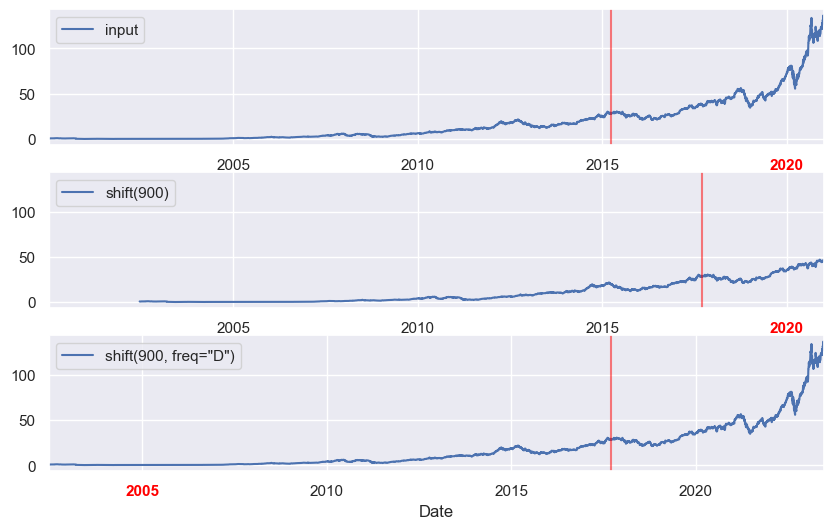

In [179]:
fig, ax = plt.subplots(3, sharey=True, figsize=(10, 6))
data = price.asfreq('D', method='pad') # ='ffill'
data.plot(ax = ax[0])
data.shift(900).plot(ax = ax[1])
data.shift(900,freq='D').plot(ax = ax[2])

local_max =pd.Timestamp('2015-04-01')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='bold', color='red')
ax[0].axvline(local_max, alpha=0.5, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='bold', color='red')
ax[1].axvline(local_max + offset, alpha=0.5, color='red')
ax[2].legend(['shift(900, freq="D")'], loc=2)
ax[2].get_xticklabels()[1].set(weight='bold', color='red')
ax[2].axvline(local_max + offset, alpha=0.5, color='red')
plt.show()

In [185]:
data = price.asfreq('D', method='pad').iloc[:5]
data.shift(3)

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06    0.860883
2000-01-07    0.788302
Freq: D, Name: Close, dtype: float64

In [186]:
data.shift(3, freq='D')


Date
2000-01-06    0.860883
2000-01-07    0.788302
2000-01-08    0.799837
2000-01-09    0.730621
2000-01-10    0.765229
Freq: D, Name: Close, dtype: float64

<Axes: xlabel='Date'>

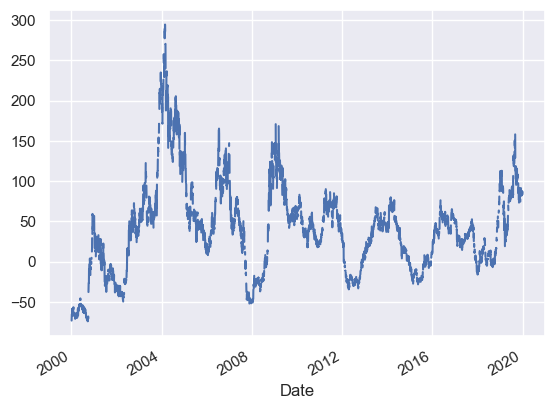

In [189]:
ROI = 100 * (price.shift(-365, freq='D') / price - 1)
ROI.plot()

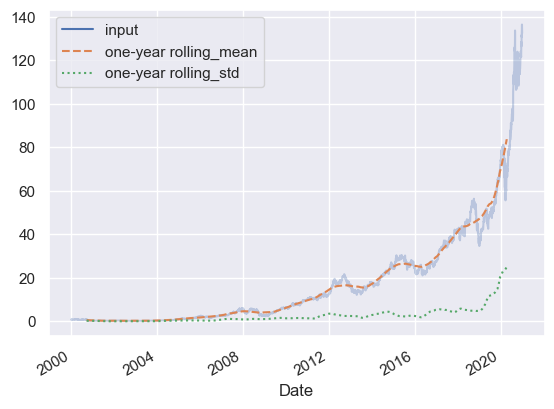

In [190]:
rolling = price.rolling(365, center=True)
data = pd.DataFrame({'input': price,'one-year rolling_mean': rolling.mean(), 'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [198]:
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter_20240715.csv')
data.head()

,Date,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
0,10/02/2012 01:00:00 PM,55.0,7.0,48.0
1,10/02/2012 02:00:00 PM,130.0,55.0,75.0
2,10/02/2012 03:00:00 PM,152.0,81.0,71.0
3,10/02/2012 04:00:00 PM,278.0,167.0,111.0
4,10/02/2012 05:00:00 PM,563.0,393.0,170.0


In [202]:
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter_20240715.csv', index_col='Date', parse_dates=True, date_format='%m/%d/%Y %I:%M:%S %p')
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [203]:
data.columns=['St1', 'St2', 'St3']
data.head()

,St1,St2,St3
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [204]:
data['Total'] = data.eval('St1 + St2 + St3')
data.dropna().describe()

,St1,St2,St3,Total
count,102919.000000,102919.000000,102919.000000,102919.000000
mean,105.726678,45.540386,60.186292,211.453357
std,131.828673,59.811079,81.791663,263.657346
min,0.000000,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000,26.000000
50%,59.000000,26.000000,32.000000,118.000000
75%,144.000000,62.000000,79.000000,288.000000
max,1097.000000,667.000000,850.000000,2194.000000


<Axes: xlabel='Date'>

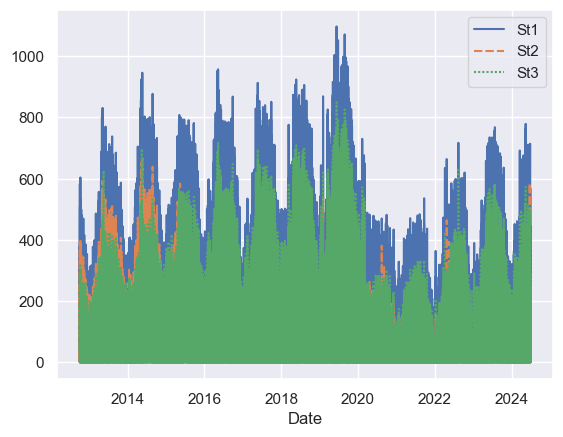

In [210]:
sns.lineplot(data=data[['St1', 'St2', 'St3']])

<Axes: xlabel='Date'>

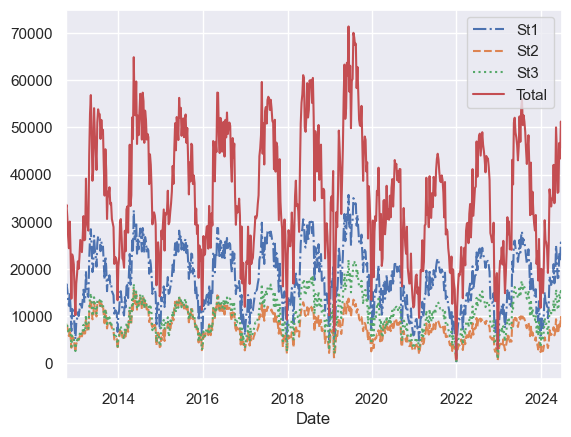

In [214]:
weekly = data.resample('W').sum()
weekly.plot(style=['-.', '--', ':','-'])

<Axes: xlabel='Date'>

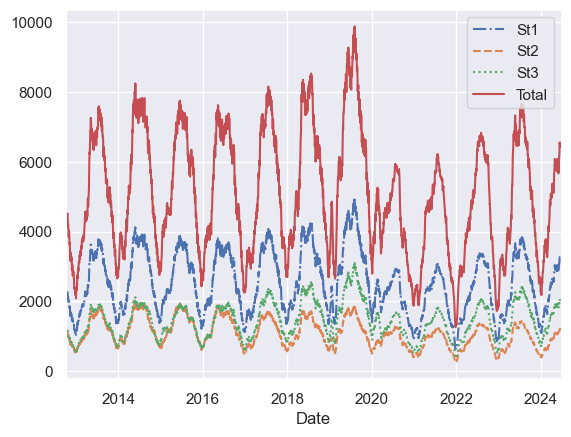

In [217]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).mean().plot(style=['-.', '--', ':','-'])

<Axes: xlabel='Date'>

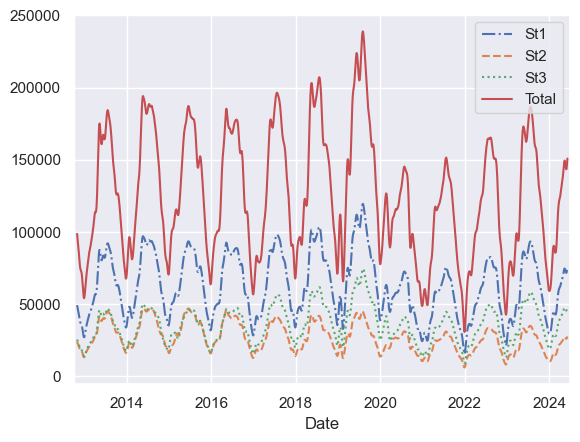

In [221]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=['-.', '--', ':','-'])

In [242]:
by_time = data.groupby(data.index.time).mean()
by_time

,St1,St2,St3,Total
00:00:00,10.175140,4.458256,5.716884,20.350280
01:00:00,5.441231,2.460121,2.981110,10.882463
02:00:00,3.584425,1.595650,1.988775,7.168849
03:00:00,2.612640,1.214785,1.397854,5.225280
04:00:00,6.114039,2.745336,3.368703,12.228078
05:00:00,22.576026,10.862407,11.713619,45.152052
06:00:00,77.674207,36.820896,40.853312,155.348414
07:00:00,192.363806,90.982976,101.380830,384.727612
08:00:00,274.414646,124.726679,149.687966,548.829291
09:00:00,168.453930,72.958479,95.495451,336.907861


In [243]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)
hourly_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])

<Axes: xlabel='time'>

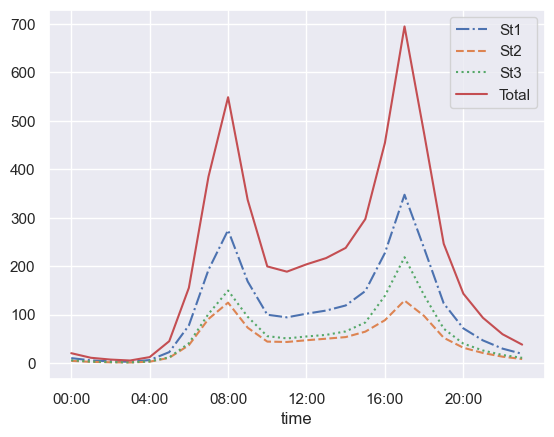

In [244]:
by_time.plot(xticks=hourly_ticks, style=['-.', '--', ':','-'])

<Axes: >

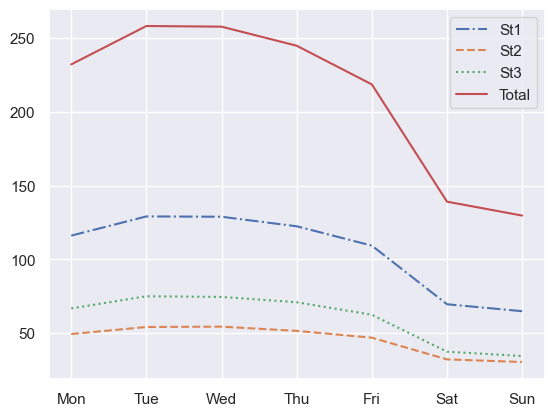

In [246]:
by_day = data.groupby(data.index.dayofweek).mean()
by_day.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
by_day.plot(style=['-.', '--', ':','-'])

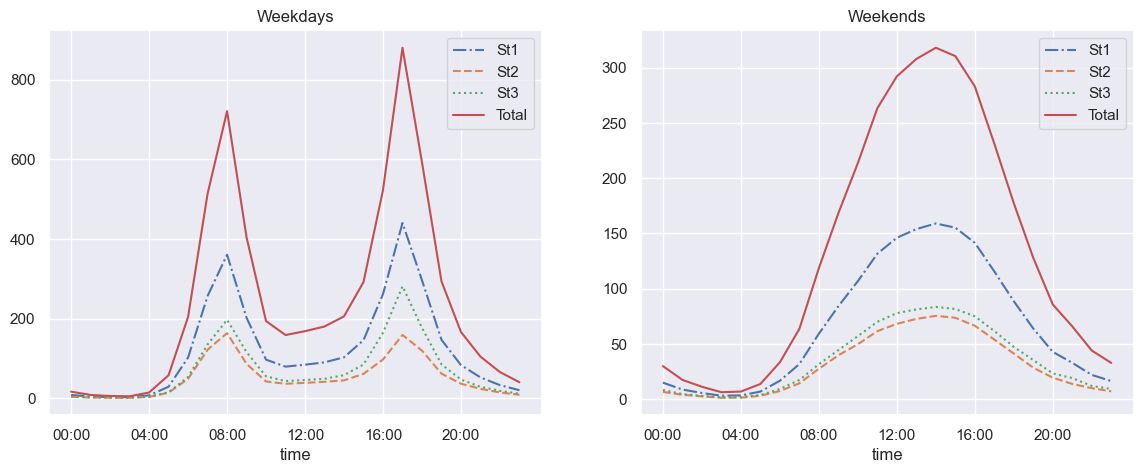

In [247]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], xticks=hourly_ticks, style=['-.', '--', ':','-'], title='Weekdays')
by_time.loc['Weekend'].plot(ax=ax[1], xticks=hourly_ticks, style=['-.', '--', ':','-'], title='Weekends')
plt.show()

In [249]:
weekend.shape

(102947,)

In [253]:
nrows, ncols = 10000, 100
rng = np.random.RandomState(seed=42)

In [254]:
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))

In [255]:
%timeit df1 + df2 + df3 + df4

2.56 ms ± 289 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [256]:
%timeit pd.eval('df1 + df2 + df3 + df4')

1.25 ms ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [257]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3))) for i in range(5))

In [258]:
result1 = -df1 * df2 / (df3 + df4) - df5 
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5') 
np.allclose(result1, result2)

True

In [259]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4') 
np.allclose(result1, result2)

True

In [260]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)

result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')

np.allclose(result1, result2)

True

In [261]:
result1 = df2.T[0] + df3.iloc[1]

result2 = pd.eval('df2.T[0] + df3.iloc[1]')

np.allclose(result1, result2)

True

In [287]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])

df.head()

,A,B,C
0,0.649261,0.231852,0.368063
1,0.604270,0.546910,0.025961
2,0.957409,0.983955,0.550858
3,0.258480,0.625188,0.068119
4,0.536195,0.910819,0.147253


In [263]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)") 
np.allclose(result1, result2)

True

In [265]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

In [267]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df['A'] + df['B']) / (df['C'] - 1)") 
np.allclose(result1, result2)

ValueError: data type must provide an itemsize

In [268]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.loc['A'] + df.loc['B']) / (df.loc['C'] - 1)") 
np.allclose(result1, result2)

ValueError: data type must provide an itemsize

In [274]:
df.iloc[3], df.loc[3]

(A    0.741817
 B    0.243234
 C    0.337768
 Name: 3, dtype: float64,
 A    0.741817
 B    0.243234
 C    0.337768
 Name: 3, dtype: float64)

In [278]:
pd.eval('D = (A + B) / C', inplace=True)
df.head()

ValueError: cannot assign without a target object

In [291]:
column_mean = df.mean(axis=1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

In [295]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]') 
np.allclose(result1, result2)

True

In [297]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)


True

In [298]:
result2 = df.query('A < 0.5 & B < 0.5')
np.allclose(result1, result2)

True

In [300]:
Cmean = df['C'].mean()
result1 = df[df['C']<Cmean]['A']
result2 = df.query('C<@Cmean')['A']
np.allclose(result1, result2)

True